In [1]:
from skimage import data

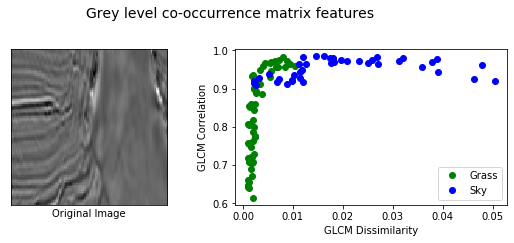

In [52]:
import matplotlib.pyplot as plt

from skimage.feature import greycomatrix, greycoprops
from skimage import data
import cv2

PATCH_SIZE = 31

# open the camera image
image = cv2.cvtColor(cv2.imread("data/884cd7af00.png"), cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(cv2.imread("data/884cd7af002.png"), cv2.COLOR_BGR2GRAY)
# select some patches from grassy areas of the image
grass_locations=[]
sky_locations=[]
for i1 in range(int(image.shape[0]/10)):
    for j1 in range(int(image.shape[1]/10)):
        i=i1*10
        j=j1*10
        if(image2[i,j]==0):
            grass_locations.append((i,j))
        if(image2[i,j]==255):
            sky_locations.append((i,j))
#grass_locations = [(20, 70), (40, 80)]
grass_patches = []
for loc in grass_locations:
    grass_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from sky areas of the image
#sky_locations = [(20, 10), (41, 10)]
sky_patches = []
for loc in sky_locations:
    sky_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

# compute some GLCM properties each patch
xs = []
ys = []
for patch in (grass_patches + sky_patches):
    glcm = greycomatrix(patch, distances=[1], angles=[90], levels=256,
                        symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'ASM')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])

# create the figure
fig = plt.figure(figsize=(8, 8))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
#for (y, x) in grass_locations:
#    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
#for (y, x) in sky_locations:
#    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go',
        label='Grass')
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo',
        label='Sky')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display the image patches
#for i, patch in enumerate(grass_patches):
#    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
#    ax.imshow(patch, cmap=plt.cm.gray,
#              vmin=0, vmax=255)
#    ax.set_xlabel('Grass %d' % (i + 1))

#for i, patch in enumerate(sky_patches):
#    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
#    ax.imshow(patch, cmap=plt.cm.gray,
#              vmin=0, vmax=255)
#    ax.set_xlabel('Sky %d' % (i + 1))


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

In [15]:
print(image2)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


In [17]:
print(grass_locations)

AttributeError: 'list' object has no attribute 'shape'